<a href="https://colab.research.google.com/github/aman5898/Data-Science-Extended-LRC/blob/main/22-01-08-LinearRegression/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.sample(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88,24.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 
25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract 
bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 
1940

DIS: Weighted distances to five Boston employment 
centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of 
[people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s




In [ ]:
df.isna().sum()

In [6]:
df.corr()['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [11]:
df = df.drop(['zn', 'b', 'dis', 'chas'], axis = 1)
df

,crim,indus,nox,rm,age,rad,tax,ptratio,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,1,296,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,2,242,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,2,242,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,3,222,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,1,273,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,1,273,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,1,273,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,1,273,21.0,6.48,22.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


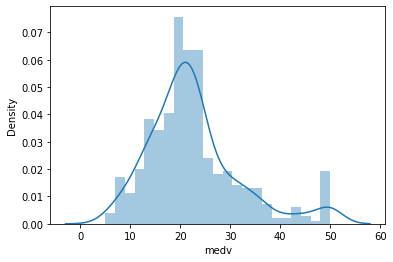

In [8]:
import seaborn as sns

sns.distplot(df['medv'])

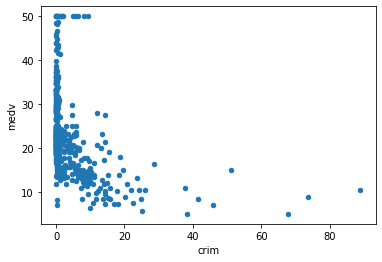

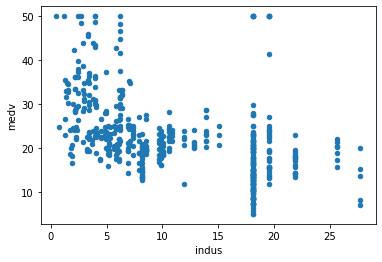

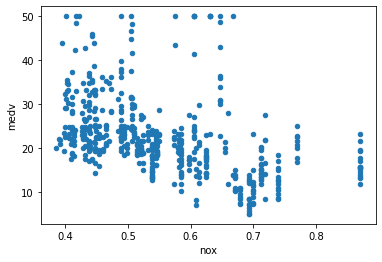

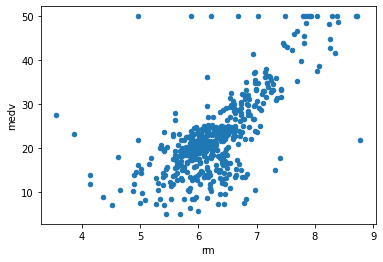

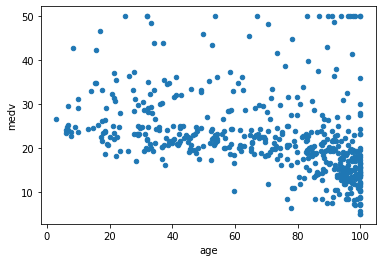

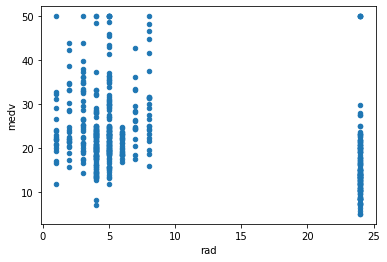

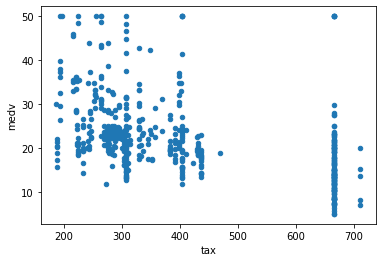

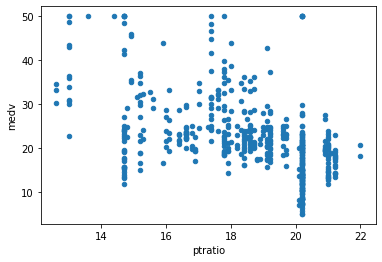

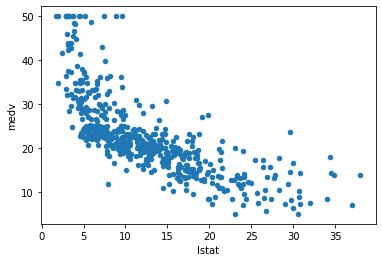

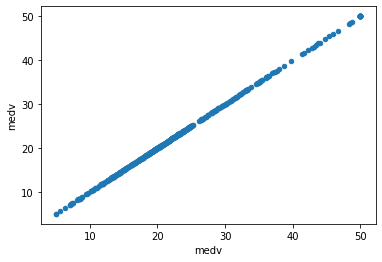

In [15]:
for col in df.columns:
  df.plot(kind = 'scatter', x = col ,y='medv')
  

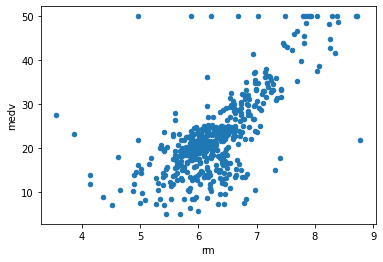

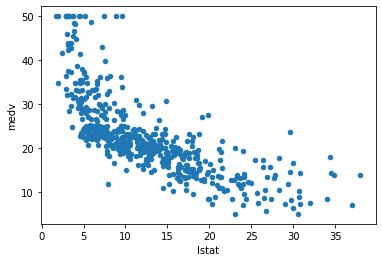

In [12]:


df.plot(kind = 'scatter', x = 'rm',y='medv')
df.plot(kind = 'scatter', x = 'lstat',y='medv')

In [16]:
df['lstatINV'] = 1/df['lstat']

In [17]:
X = df.drop('medv', axis = 1)
y = df['medv']

In [18]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
x = rs.fit_transform(X)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lin = LinearRegression()

scores = cross_validate(lin, x, y, cv = 3, scoring='neg_mean_squared_error')


In [25]:
-scores['test_score']

array([14.64985824, 39.21748187, 78.30910188])

In [26]:
lin.fit(x,y )

print('Slopes', lin.coef_)

Slopes [-0.4983284   0.96916514 -1.59466959  1.86723464  2.50282704  6.32450902
 -5.58795775 -2.46720257 -2.51019519  4.55946974]


In [27]:
from sklearn.linear_model import Ridge

rig = Ridge()

rig.fit(x, y)

print('Slopes', rig.coef_)

Slopes [-0.48819241  0.78389325 -1.50605918  1.90067205  2.44397863  5.56367705
 -4.81115651 -2.42495352 -2.48955605  4.54331399]


In [28]:
from sklearn.linear_model import Lasso

las = Lasso()

las.fit(x, y)

las.coef_

array([-0.54237555, -0.        , -0.        ,  2.20899493, -0.        ,
       -0.        , -0.        , -0.71239184, -0.        ,  4.70668911])

In [30]:
print('Linear', -cross_validate(lin, x, y, cv = 3, scoring='neg_mean_squared_error')['test_score'])
print('Ridge', -cross_validate(rig, x, y, cv = 3, scoring='neg_mean_squared_error')['test_score'])
print('Lasso', -cross_validate(las, x, y, cv = 3, scoring='neg_mean_squared_error')['test_score'])

Linear [14.64985824 39.21748187 78.30910188]
Ridge [14.12997458 39.49670497 77.04598769]
Lasso [10.70752714 55.1679832  79.632646  ]
